# Описание проекта 

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить 
потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, 
изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры 
графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. 
Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через 
специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. 
Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. 
Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и 
оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. 
Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

<h1>План работы:</h1>
<ol>
 <li>Исследовательский и статистичский анализ данных, обработка null-значений. <b>Дедлайн</b> - 03.10.20.</li>
 <li>Подготовка данных к обучению модели (масштабирование признаков, разбиение датасета на обучающую и тестовую выборки). <b>Дедлайн</b> - 04.10.20</li>
 <li>Обучение нескольких моделей, выбор наилучшей.  <b>Дедлайн</b> - 07.10.20</li>
 <li>Тестирование модели и проверка на адекватность. <b>Дедлайн</b> - 07.10.20</li>
 <li>Подготовка отчета. <b>Дедлайн</b> - 08.10.20</li>
</ol>

<h2>Вопросы:</h2>
<ol>
    <li>Правильно ли я понимаю, что задача оптимизации производственного процесса состоит в том, чтобы за наименьшее количество итераций достигнуть необходимой температуры и целевого химического состава?</li>
    <li>Почему задача стоит как сокращение электроэнергии, а целевой показатель температура? А не объем сыпучих материалов или мощность нагрева?</li>
    <li>Какую температуру должна предстказывать модель: финальную или на каждой итерации?</li>
    <li>В таблице с данными об измерениях температуры есть пустые значения: замеры не были получены или это означает, что температура не изменилась?</li>
    <li>Есть ли шаблон отчета?</li>
</ol>

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_arc = pd.read_csv('C:/Users/Димачка-хороший/Documents/Юля/Яндекс.Практикум/final_steel/data_arc.csv', parse_dates=[1, 2])
data_bulk = pd.read_csv('C:/Users/Димачка-хороший/Documents/Юля/Яндекс.Практикум/final_steel/data_bulk.csv')
data_bulk_time = pd.read_csv('C:/Users/Димачка-хороший/Documents/Юля/Яндекс.Практикум/final_steel/data_bulk_time.csv', 
                             parse_dates=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
data_gas = pd.read_csv('C:/Users/Димачка-хороший/Documents/Юля/Яндекс.Практикум/final_steel/data_gas.csv')
data_temp = pd.read_csv('C:/Users/Димачка-хороший/Documents/Юля/Яндекс.Практикум/final_steel/data_temp.csv', parse_dates=[1])
data_wire = pd.read_csv('C:/Users/Димачка-хороший/Documents/Юля/Яндекс.Практикум/final_steel/data_wire.csv')
data_wire_time = pd.read_csv('C:/Users/Димачка-хороший/Documents/Юля/Яндекс.Практикум/final_steel/data_wire_time.csv', 
                             parse_dates=[1, 2, 3, 4, 5, 6, 7, 8, 9])

### Первичный анализ данных

*Данные об электродах*

In [4]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


In [5]:
data_arc.head(10)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494


Переименуем столбцы в названия с латинскими буквами.

In [6]:
data_arc.columns = ['key', 'arc_heating_start', 'arc_heating_stop',
       'active_power', 'reactive_power']

In [7]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                14876 non-null  int64         
 1   arc_heating_start  14876 non-null  datetime64[ns]
 2   arc_heating_stop   14876 non-null  datetime64[ns]
 3   active_power       14876 non-null  float64       
 4   reactive_power     14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


In [8]:
len(data_arc['key'].unique())

3214

*Данные о подаче сыпучих материалов (объём)*

In [9]:
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [10]:
data_bulk.head(10)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


*Данные о подаче сыпучих материалов (время)*

In [11]:
data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


In [12]:
data_bulk_time.head(10)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaT,NaT,NaT,2019-05-03 11:21:30,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:03:52,NaT,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaT,NaT,NaT,2019-05-03 11:46:38,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:40:20,NaT,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaT,NaT,NaT,2019-05-03 12:31:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:09:40,NaT,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaT,NaT,NaT,2019-05-03 12:48:43,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:41:24,NaT,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaT,NaT,NaT,2019-05-03 13:18:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:12:56,NaT,2019-05-03 13:12:56,2019-05-03 13:12:56
5,6,NaT,NaT,NaT,2019-05-03 13:59:24,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:53:27,NaT,2019-05-03 13:53:27,2019-05-03 13:53:27
6,7,NaT,NaT,NaT,2019-05-03 14:29:14,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 14:22:19,NaT,2019-05-03 14:22:19,2019-05-03 14:22:19
7,8,NaT,NaT,NaT,2019-05-03 15:04:05,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 14:55:46,NaT,2019-05-03 14:55:46,2019-05-03 14:55:46
8,9,NaT,NaT,NaT,2019-05-03 15:47:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 15:41:00,NaT,2019-05-03 15:41:00,2019-05-03 15:41:00
9,10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 16:18:52,NaT,2019-05-03 16:18:52,2019-05-03 16:18:52


*Данные о продувке сплава газом*

In [13]:
data_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [14]:
data_gas.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


Переименуем столбцы в названия с латинскими буквами

In [15]:
data_gas.columns = ['key', 'gas 1']

In [16]:
data_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


*Результаты измерения температуры*

In [17]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           15907 non-null  int64         
 1   Время замера  15907 non-null  datetime64[ns]
 2   Температура   13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


In [18]:
data_temp.head(10)

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


Переименуем столбцы в названия с латинскими буквами

In [19]:
data_temp.columns = ['key', 'measurement_time', 'temperature']

In [20]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   key               15907 non-null  int64         
 1   measurement_time  15907 non-null  datetime64[ns]
 2   temperature       13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


Подсчитаем количество партий, количество уникальных значений параметра **key**

In [21]:
len(data_temp['key'].unique())

3216

*Данные о проволочных материалах (объём)*

In [22]:
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [23]:
data_wire.head(10)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Данные о проволочных материалах (время)*

In [24]:
data_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


In [25]:
data_wire_time.head(10)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:46:10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:13:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:48:05,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5,6,2019-05-03 13:59:02,2019-05-03 13:59:54,NaT,NaT,NaT,NaT,NaT,NaT,NaT
6,7,2019-05-03 14:28:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
7,8,2019-05-03 15:03:42,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
8,9,2019-05-03 15:42:43,2019-05-03 15:58:12,NaT,NaT,NaT,NaT,NaT,NaT,NaT
9,10,2019-05-03 16:20:25,2019-05-03 16:21:02,NaT,NaT,NaT,NaT,NaT,NaT,NaT


#### Данные об обработке стали содержатся в 7 датасетах. Данные об измерениях температуры имеются для 3214 партий. В данных об сыпучих материалах, проволке и измерениях температуры содержатся null-значения, их необходимо будет обработать. Также проанализируем данные на наличие выбросов.

## Исследовательский и статистический анализ данных

### Обработка null-значений

Рассмотрим таблицу **data_temp**, в ней содержится 2901 пустая запись. Заполним null-значения предшествующим валидным значением температуры, первичное измерение есть для всех значений **key**.

In [26]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   key               15907 non-null  int64         
 1   measurement_time  15907 non-null  datetime64[ns]
 2   temperature       13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


In [27]:
data_temp = data_temp.dropna(subset=['temperature'])

In [28]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13006 entries, 0 to 15902
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   key               13006 non-null  int64         
 1   measurement_time  13006 non-null  datetime64[ns]
 2   temperature       13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 406.4 KB


In [29]:
data_temp.loc[data_temp['key'] == 3240]

,key,measurement_time,temperature
15894,3240,2019-09-01 02:39:01,1617.0


Рассмотрим таблицы **data_bulk** и **data_wire**. Заполним null-значения 0, так как отсутствие данных означает, что добавление примесей не проводилось.

In [30]:
data_bulk.fillna(0, inplace=True)

In [31]:
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   3129 non-null   float64
 2   Bulk 2   3129 non-null   float64
 3   Bulk 3   3129 non-null   float64
 4   Bulk 4   3129 non-null   float64
 5   Bulk 5   3129 non-null   float64
 6   Bulk 6   3129 non-null   float64
 7   Bulk 7   3129 non-null   float64
 8   Bulk 8   3129 non-null   float64
 9   Bulk 9   3129 non-null   float64
 10  Bulk 10  3129 non-null   float64
 11  Bulk 11  3129 non-null   float64
 12  Bulk 12  3129 non-null   float64
 13  Bulk 13  3129 non-null   float64
 14  Bulk 14  3129 non-null   float64
 15  Bulk 15  3129 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [32]:
data_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0


In [33]:
data_wire.fillna(0, inplace=True)

In [34]:
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3081 non-null   float64
 2   Wire 2  3081 non-null   float64
 3   Wire 3  3081 non-null   float64
 4   Wire 4  3081 non-null   float64
 5   Wire 5  3081 non-null   float64
 6   Wire 6  3081 non-null   float64
 7   Wire 7  3081 non-null   float64
 8   Wire 8  3081 non-null   float64
 9   Wire 9  3081 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [35]:
data_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Исследовательский анализ данных

In [36]:
# Функция построения гистограммы и боксплот
def stat_plot(data, param, bins=10):
    # Create Fig
    fig = plt.figure(figsize=(15, 6), dpi= 80)
    grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

    # Define the axes
    ax_main = fig.add_subplot(grid[:-1, :-1])
    ax_right = fig.add_subplot(grid[:-1, -1])
    
    # histogram on main ax
    ax_main.hist(data[param], bins, histtype='stepfilled', orientation='vertical')

    # boxplot in the right
    ax_right.boxplot(data[param])
    ax_right.grid(axis='y')

    # Decorations
    ax_main.set(title='Гистограмма и боксплот по параметру '+param)

    plt.show()

In [37]:
# Функция удаления выбросов
def delete_blowout(data, param, q=1.5):
    q25 = data[param].describe()['25%']
    q75 = data[param].describe()['75%']
    bottom_line = q25 - q * (q75 - q25)
    upper_line = q75 + q * (q75 - q25)
    data.drop(data.loc[data[param] < bottom_line].index, axis=0, inplace=True)
    data.drop(data.loc[data[param] > upper_line].index, axis=0, inplace=True)

### Рассчет количества и длительности нагрева электродами, суммарной активной и реактивной мощности по каждому из значений **key**

In [38]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                14876 non-null  int64         
 1   arc_heating_start  14876 non-null  datetime64[ns]
 2   arc_heating_stop   14876 non-null  datetime64[ns]
 3   active_power       14876 non-null  float64       
 4   reactive_power     14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


In [39]:
data_arc['heating_time'] = data_arc['arc_heating_stop'] - data_arc['arc_heating_start']

In [40]:
data_arc.head()

,key,arc_heating_start,arc_heating_stop,active_power,reactive_power,heating_time
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,00:03:48
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,00:03:05
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,00:02:52
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,00:06:05
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,00:02:28


In [41]:
arc_pivot = data_arc.pivot_table(index='key', values=['active_power', 'reactive_power', 'heating_time'], aggfunc={'count', 'sum'})

In [42]:
arc_pivot.head()

active_power           heating_time          reactive_power          
           count       sum        count      sum          count       sum
key                                                                      
1              5  4.878147            5 00:18:18              5  3.183241
2              4  3.052598            4 00:13:31              4  1.998112
3              5  2.525882            5 00:10:55              5  1.599076
4              4  3.209250            4 00:12:21              4  2.060298
5              4  3.347173            4 00:14:29              4  2.252643

In [43]:
arc_pivot.columns = ['count_heating', 'active_power_sum', 'heating_time_count', 'heating_time_sum', 'reactive_power_count', 'reactive_power_sum']

In [44]:
arc_pivot.drop(['heating_time_count', 'reactive_power_count'], axis=1, inplace=True)

In [45]:
arc_pivot.head()

,count_heating,active_power_sum,heating_time_sum,reactive_power_sum
key,,,,
1,5,4.878147,00:18:18,3.183241
2,4,3.052598,00:13:31,1.998112
3,5,2.525882,00:10:55,1.599076
4,4,3.209250,00:12:21,2.060298
5,4,3.347173,00:14:29,2.252643


### Анализ распределения, выбросов и статистик

Параметр Количество запусков нагрева электродами **count_heating**

*Гистограмма и боксплот*

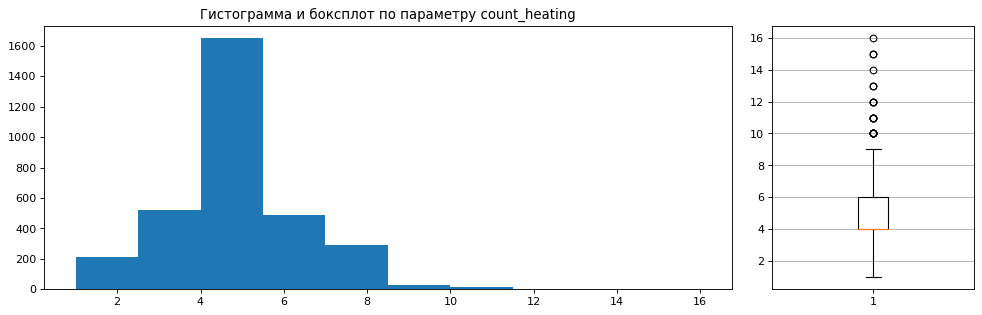

In [46]:
stat_plot(arc_pivot, 'count_heating')

*Статистики: среднее, минимальные и максимальные значения, медиана и величины 25%- и 75%-квартилей*

In [47]:
arc_pivot['count_heating'].describe()

count    3214.000000
mean        4.628500
std         1.608647
min         1.000000
25%         4.000000
50%         4.000000
75%         6.000000
max        16.000000
Name: count_heating, dtype: float64

Удалим выбросы, выходящие за границу тройного межквартильного интервала.

In [48]:
delete_blowout(arc_pivot, 'count_heating', 3)

Параметр количество запусков нагрева электродами **count_heating** имеет нормальное распределение. В среднем для партии проводится 4.6 запуска нагрева электродами. Минимальное количество нагревов 1, максимальное 16.

Параметр Сумма потребленной активной мощности **active_power_sum**

*Гистограмма и боксплот*

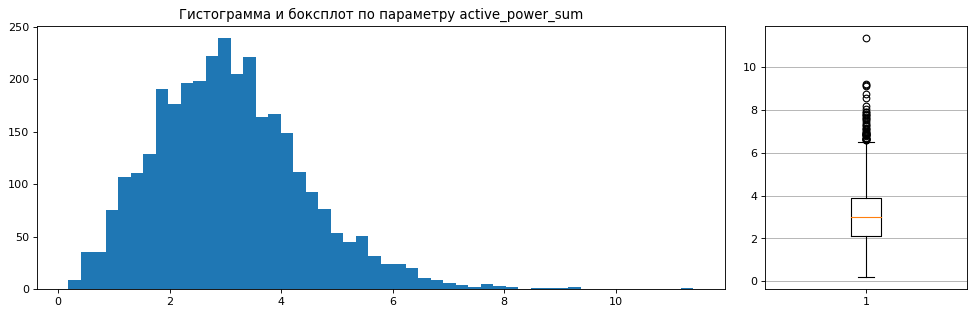

In [49]:
stat_plot(arc_pivot, 'active_power_sum', 50)

*Статистики: среднее, минимальные и максимальные значения, медиана и величины 25%- и 75%-квартилей*

In [50]:
arc_pivot['active_power_sum'].describe()

count    3208.000000
mean        3.089014
std         1.349229
min         0.186226
25%         2.125158
50%         2.989574
75%         3.896307
max        11.387710
Name: active_power_sum, dtype: float64

Удалим выбросы, выходящие за границу тройного межквартильного интервала.

In [51]:
delete_blowout(arc_pivot, 'active_power_sum', 3)

Параметр сумма потребленной активной мощности **active_power_sum** имеет нормальное распределение. В среднем для нагрева партии используется 3 единицы активной мощности. Минимальная суммарная активная мощность 0.18, максимальная - 11.39.

Параметр Сумма потребленной реактивной мощности **reactive_power_sum**

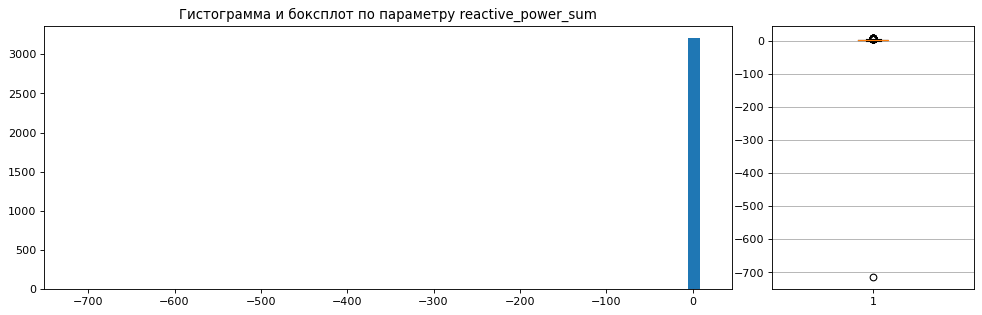

In [52]:
stat_plot(arc_pivot, 'reactive_power_sum', 50)

В данных присутствуют значения с реактивной мощностью меньше 0. Найдем эти записи и проверим данные в исходной таблице *data_arc*.

In [53]:
arc_pivot.loc[arc_pivot['reactive_power_sum'] < 0]

,count_heating,active_power_sum,heating_time_sum,reactive_power_sum
key,,,,
2116,4,1.848681,00:07:13,-714.591636


In [54]:
data_arc.loc[data_arc['key'] == 2116]

,key,arc_heating_start,arc_heating_stop,active_power,reactive_power,heating_time
9778,2116,2019-07-24 00:29:52,2019-07-24 00:31:54,0.433266,0.306141,00:02:02
9779,2116,2019-07-24 00:35:50,2019-07-24 00:38:05,0.620265,0.408352,00:02:15
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924,00:01:49
9781,2116,2019-07-24 00:51:51,2019-07-24 00:52:58,0.299368,0.198796,00:01:07


Найдена строка, в которой для реактивной мощности отрицательное значение. Для восстановления значения рассчитаем средние соотношение потребленной активной и реактивной мощности.

In [55]:
data_arc['ratio_power'] = data_arc['active_power'] / data_arc['reactive_power']

In [56]:
data_arc.head()

,key,arc_heating_start,arc_heating_stop,active_power,reactive_power,heating_time,ratio_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,00:03:48,1.420582
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,00:03:05,1.548395
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,00:02:52,1.492292
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,00:06:05,1.561504
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,00:02:28,1.671717


In [57]:
arc_mean_ratio_power = data_arc.pivot_table(index='key', values='ratio_power', aggfunc={'mean'}).reset_index()

In [58]:
arc_mean_ratio_power['mean'].describe()

count    3214.000000
mean        1.357452
std         0.132824
min         0.676106
25%         1.292892
50%         1.370550
75%         1.438292
max         1.782164
Name: mean, dtype: float64

Средний коэффициент соотношения потребленной активной и реактивной мощности равен 1.357. Восстановим некорректное значение реактивной мощности.

In [59]:
data_arc.loc[9780, 'reactive_power'] = data_arc.loc[9780, 'active_power'] / 1.357452

In [60]:
data_arc.loc[data_arc['key'] == 2116]

,key,arc_heating_start,arc_heating_stop,active_power,reactive_power,heating_time,ratio_power
9778,2116,2019-07-24 00:29:52,2019-07-24 00:31:54,0.433266,0.306141,00:02:02,1.415252
9779,2116,2019-07-24 00:35:50,2019-07-24 00:38:05,0.620265,0.408352,00:02:15,1.518947
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,0.365230,00:01:49,-0.000693
9781,2116,2019-07-24 00:51:51,2019-07-24 00:52:58,0.299368,0.198796,00:01:07,1.505906


Обновим данные в сводной таблице. Рассчитаем суммарную реактивную мощность для **key** равным 2116.

In [61]:
arc_pivot.loc[2116, 'reactive_power_sum'] = data_arc.loc[data_arc['key'] == 2116, 'reactive_power'].sum()

Проверим отсутствие отрицательных значений для поля **reactive_power_sum**.

In [62]:
arc_pivot.loc[arc_pivot['reactive_power_sum'] < 0]

,count_heating,active_power_sum,heating_time_sum,reactive_power_sum
key,,,,


Построим гистограмму и боксплот на исправленных данных.

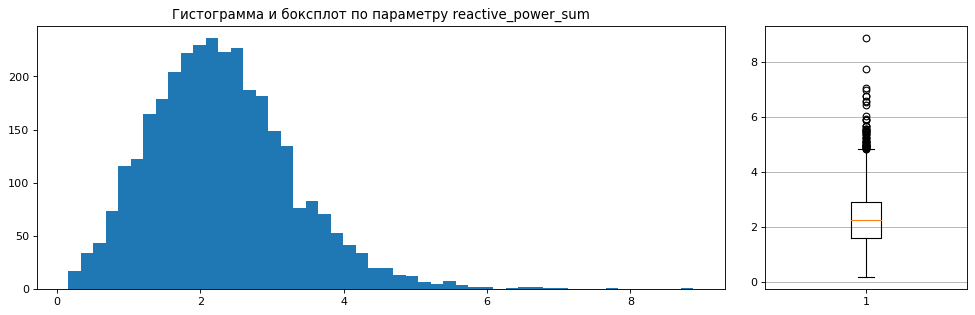

In [63]:
stat_plot(arc_pivot, 'reactive_power_sum', 50)

*Статистики: среднее, минимальные и максимальные значения, медиана и величины 25%- и 75%-квартилей*

In [64]:
arc_pivot['reactive_power_sum'].describe()

count    3206.000000
mean        2.302121
std         1.002543
min         0.158247
25%         1.598756
50%         2.227459
75%         2.887711
max         8.876344
Name: reactive_power_sum, dtype: float64

Удалим выбросы, выходящие за границу тройного межквартильного интервала.

In [65]:
delete_blowout(arc_pivot, 'reactive_power_sum', 3)

Параметр сумма потребленной реактивной мощности **reactive_power_sum** имеет нормальное распределение. В среднем для нагрева партии используется 2.3 единицы реактивной мощности. Минимальная суммарная реактивная мощность 0.16, максимальная - 8.88.

#### Рассчет полной мощности потребленной для нагрева электродов.

Восспользуемся формулой:  
* $S$ - полная мощность
* $P$ - активная мощность
* $Q$ - реактивная мощность

$$
S = \sqrt{P^{2} + Q^{2}}
$$

In [66]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   key                14876 non-null  int64          
 1   arc_heating_start  14876 non-null  datetime64[ns] 
 2   arc_heating_stop   14876 non-null  datetime64[ns] 
 3   active_power       14876 non-null  float64        
 4   reactive_power     14876 non-null  float64        
 5   heating_time       14876 non-null  timedelta64[ns]
 6   ratio_power        14876 non-null  float64        
dtypes: datetime64[ns](2), float64(3), int64(1), timedelta64[ns](1)
memory usage: 813.7 KB


In [67]:
data_arc.head()

,key,arc_heating_start,arc_heating_stop,active_power,reactive_power,heating_time,ratio_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,00:03:48,1.420582
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,00:03:05,1.548395
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,00:02:52,1.492292
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,00:06:05,1.561504
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,00:02:28,1.671717


In [68]:
import math

In [69]:
def full_power(row):
    full_power = math.sqrt(row['active_power']**2 + row['reactive_power']**2)
    return full_power

In [70]:
data_arc['full_power'] = data_arc.apply(full_power, axis=1)

In [71]:
data_arc.head()

,key,arc_heating_start,arc_heating_stop,active_power,reactive_power,heating_time,ratio_power,full_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,00:03:48,1.420582,1.193639
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,00:03:05,1.548395,0.959010
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,00:02:52,1.492292,0.896038
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,00:06:05,1.561504,1.970470
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,00:02:28,1.671717,0.807239


Рассчитаем суммарную полную энергию потребленную для нагрева каждой партии.

In [72]:
arc_full_power_sum = data_arc.pivot_table(index='key', values='full_power', aggfunc={'sum'}).reset_index()

In [73]:
arc_full_power_sum.head()

,key,sum
0,1,5.826395
1,2,3.649216
2,3,2.989534
3,4,3.814962
4,5,4.035758


*Построим гистограмму и боксплот*

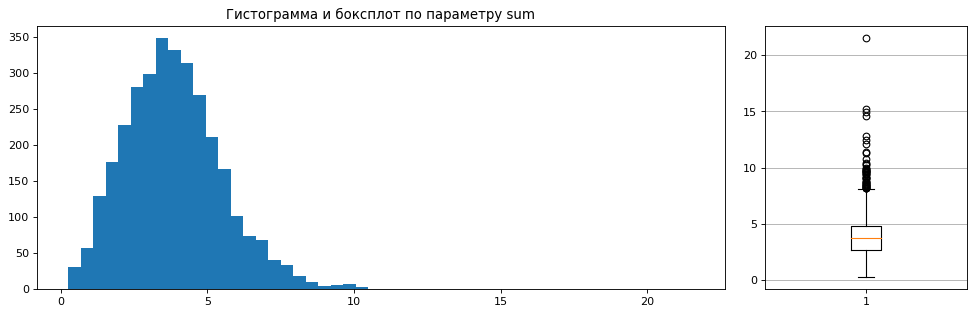

In [74]:
stat_plot(arc_full_power_sum, 'sum', 50)

*Статистики: среднее, минимальные и максимальные значения, медиана и величины 25%- и 75%-квартилей*

In [75]:
arc_full_power_sum['sum'].describe()

count    3214.000000
mean        3.882167
std         1.740046
min         0.257637
25%         2.674763
50%         3.749955
75%         4.858563
max        21.564771
Name: sum, dtype: float64

Удалим выбросы, выходящие за границу тройного межквартильного интервала.

In [76]:
delete_blowout(arc_full_power_sum, 'sum', 3)

Параметр сумма потребленной полной мощности **full_power_sum** имеет нормальное распределение. В среднем для нагрева партии используется 3.88 единицы полной мощности. Минимальная суммарная полная мощность 1.74, максимальная - 21.56.

### Исследование целевого параметра Финальная температура

#### Получим финальную темрепатуру и рассчитаем дельту нагрева от первого замера до последнего для каждой партии.

Предварительно рассчитаем количество замеров по каждому уникальному **key**

In [77]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13006 entries, 0 to 15902
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   key               13006 non-null  int64         
 1   measurement_time  13006 non-null  datetime64[ns]
 2   temperature       13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 406.4 KB


In [78]:
data_temp_count = data_temp['key'].value_counts().reset_index()

Проверим, что для всех партий есть информация о минимум 2х замерах.

In [79]:
data_temp_count.columns = ['key', 'count']

In [80]:
data_temp_key_list = data_temp_count.loc[data_temp_count['count'] < 2, 'key'].values

In [81]:
len(data_temp_key_list)

741

Для 741 партии содержится только одна запись о замере температуры, удалим данные из датасета *data_temp*.

In [82]:
data_temp_index = data_temp.loc[data_temp['key'].isin(data_temp_key_list)].index

In [83]:
data_temp.drop(data_temp_index, axis=0, inplace=True)

In [84]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12265 entries, 0 to 12266
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   key               12265 non-null  int64         
 1   measurement_time  12265 non-null  datetime64[ns]
 2   temperature       12265 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 383.3 KB


Получим списко уникальных значений параметра **key**

In [85]:
temp_key = data_temp['key'].unique()

Сформируем таблицу содержащую данные о начальной, финальной температуре и разнице между ними.

In [86]:
temp_diff = [[]]

In [87]:
k=0
for key in temp_key:
    temp_list = data_temp.loc[data_temp['key'] == key, 'temperature'].reset_index(drop=True)
    key_diff_temp = temp_list[len(temp_list)-1] - temp_list[0]
    temp_diff[k].append(key)
    temp_diff[k].append(temp_list[0])
    temp_diff[k].append(temp_list[len(temp_list)-1])
    temp_diff[k].append(key_diff_temp)
    temp_diff.append([])
    k+=1

In [88]:
temp_diff = pd.DataFrame(temp_diff, columns=['key', 'first_temperature', 'last_temperature', 'temp_diff'])

In [89]:
temp_diff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                2475 non-null   float64
 1   first_temperature  2475 non-null   float64
 2   last_temperature   2475 non-null   float64
 3   temp_diff          2475 non-null   float64
dtypes: float64(4)
memory usage: 77.5 KB


In [90]:
temp_diff = temp_diff.drop(2475, axis=0)

In [91]:
temp_diff['key'] = temp_diff['key'].astype(int)

In [92]:
temp_diff

,key,first_temperature,last_temperature,temp_diff
0,1,1571.0,1613.0,42.0
1,2,1581.0,1602.0,21.0
2,3,1596.0,1599.0,3.0
3,4,1601.0,1625.0,24.0
4,5,1576.0,1602.0,26.0
...,...,...,...,...
2470,2495,1570.0,1591.0,21.0
2471,2496,1554.0,1591.0,37.0
2472,2497,1571.0,1589.0,18.0
2473,2498,1591.0,1594.0,3.0


Параметр Финальная температура **last_temperature**

*Построим гистограмму и боксплот*

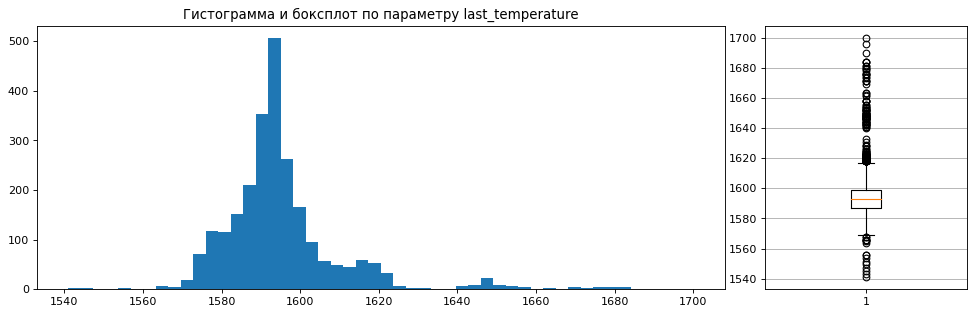

In [93]:
stat_plot(temp_diff, 'last_temperature', 50)

*Статистики: среднее, минимальные и максимальные значения, медиана и величины 25%- и 75%-квартилей*

In [94]:
temp_diff['last_temperature'].describe()

count    2475.000000
mean     1595.336162
std        16.023153
min      1541.000000
25%      1587.000000
50%      1593.000000
75%      1599.000000
max      1700.000000
Name: last_temperature, dtype: float64

Удалим выбросы, выходящие за границу тройного межквартильного интервала.

In [95]:
delete_blowout(temp_diff, 'last_temperature', 3)

Параметр финальная температура **last_temperature** имеет нормальное распределение. В среднем партия нагревается до 1594 градусов. Минимальная температура составляет 1529 градусов, максимальная - 1700.

Параметр Дельта между начальной и финальной температурой **temp_diff**

*Построим гистограмму и боксплот*

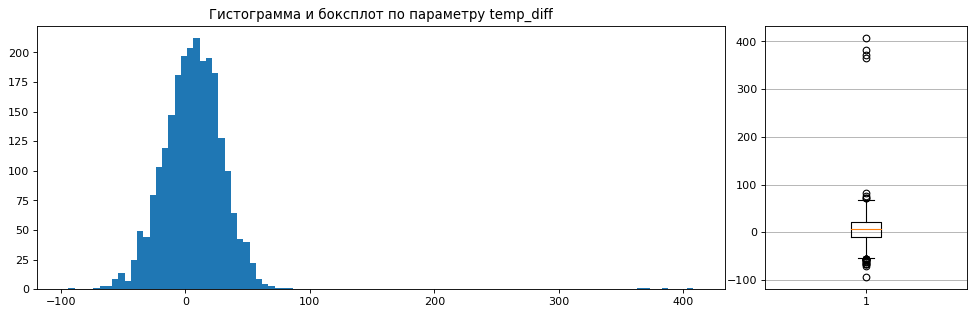

In [96]:
stat_plot(temp_diff, 'temp_diff', 100)

*Статистики: среднее, минимальные и максимальные значения, медиана и величины 25%- и 75%-квартилей*

In [97]:
temp_diff['temp_diff'].describe()

count    2389.000000
mean        6.559230
std        27.264439
min       -94.000000
25%        -9.000000
50%         7.000000
75%        22.000000
max       408.000000
Name: temp_diff, dtype: float64

В данных наблюдается всплеск в районе 0.

In [98]:
temp_diff.loc[temp_diff['temp_diff'] == 0, 'key'].count()

40

Удалим выбросы, выходящие за границу тройного межквартильного интервала.

In [99]:
delete_blowout(temp_diff, 'temp_diff', 3)

Параметр Дельта температур **temp_diff** имеет нормальное распределение. В среднем разница начальной и финальной температуры составляет 4.98 градусов. Минимальная разница составляет -98 градусов, максимальная - 408. Наблюдается большое количество партий, 752 штуки, для которых температура не изменилась.

Параметр Начальная температура **first_temperature**

*Построим гистограмму и боксплот*

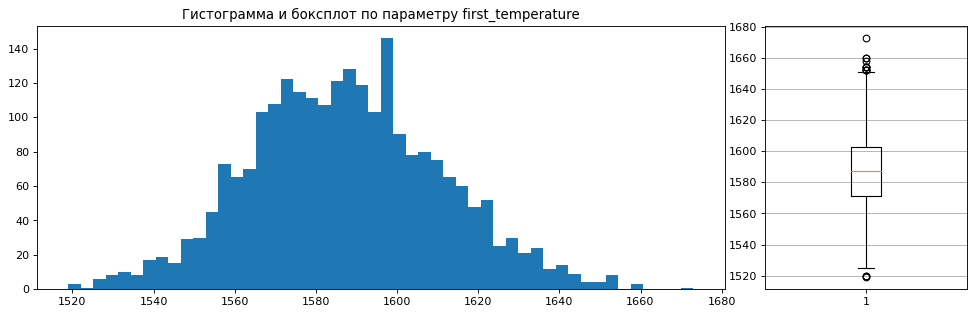

In [100]:
stat_plot(temp_diff, 'first_temperature', 50)

*Статистики: среднее, минимальные и максимальные значения, медиана и величины 25%- и 75%-квартилей*

In [101]:
temp_diff['first_temperature'].describe()

count    2385.000000
mean     1587.405451
std        23.569536
min      1519.000000
25%      1571.000000
50%      1587.000000
75%      1603.000000
max      1673.000000
Name: first_temperature, dtype: float64

Удалим выбросы, выходящие за границу тройного межквартильного интервала.

In [102]:
delete_blowout(temp_diff, 'first_temperature', 3)

Параметр финальная температура **first_temperature** имеет нормальное распределение. В среднем партия нагревается до 1588 градусов. Минимальная температура составляет 1519 градусов, максимальная - 1673.

#### Исследуем данные об инертном газе

*Построим гистограмму и боксплот*

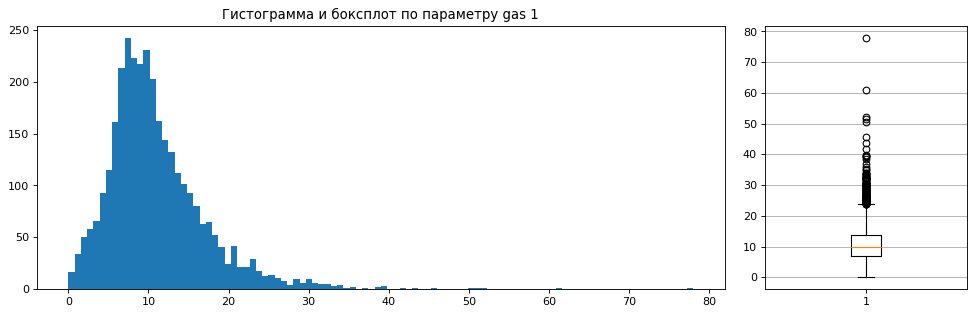

In [103]:
stat_plot(data_gas, 'gas 1', 100)

*Статистики: среднее, минимальные и максимальные значения, медиана и величины 25%- и 75%-квартилей*

In [104]:
data_gas['gas 1'].describe()

count    3239.000000
mean       11.002062
std         6.220327
min         0.008399
25%         7.043089
50%         9.836267
75%        13.769915
max        77.995040
Name: gas 1, dtype: float64

Удалим выбросы, выходящие за границу тройного межквартильного интервала.

In [105]:
delete_blowout(data_gas, 'gas 1', 3)

Параметр Объем инертного газа **gas 1** имеет нормальное распределение. В среднем на партию для продува используется 11 единиц объема инертного газа. Минимальный объем составляет 0.008 единиц, максимальная - 77.99.

#### Исследуем данные о суммарном количестве добавленных сыпучих материалов 

Рассчитаем суммарное количество сыпучих материалов и суммарное количество проволки, добавленных в каждую партию

In [106]:
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   3129 non-null   float64
 2   Bulk 2   3129 non-null   float64
 3   Bulk 3   3129 non-null   float64
 4   Bulk 4   3129 non-null   float64
 5   Bulk 5   3129 non-null   float64
 6   Bulk 6   3129 non-null   float64
 7   Bulk 7   3129 non-null   float64
 8   Bulk 8   3129 non-null   float64
 9   Bulk 9   3129 non-null   float64
 10  Bulk 10  3129 non-null   float64
 11  Bulk 11  3129 non-null   float64
 12  Bulk 12  3129 non-null   float64
 13  Bulk 13  3129 non-null   float64
 14  Bulk 14  3129 non-null   float64
 15  Bulk 15  3129 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [107]:
data_bulk['sum_bulk_add'] = data_bulk[['Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 
                                       'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12', 
                                       'Bulk 14', 'Bulk 13', 'Bulk 15']].sum(axis=1)

In [108]:
data_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,sum_bulk_add
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,553.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,582.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,544.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,595.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,584.0


In [109]:
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3081 non-null   float64
 2   Wire 2  3081 non-null   float64
 3   Wire 3  3081 non-null   float64
 4   Wire 4  3081 non-null   float64
 5   Wire 5  3081 non-null   float64
 6   Wire 6  3081 non-null   float64
 7   Wire 7  3081 non-null   float64
 8   Wire 8  3081 non-null   float64
 9   Wire 9  3081 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [110]:
data_wire['sum_wire_add'] = data_wire[['Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 
                                   'Wire 7', 'Wire 8', 'Wire 9']].sum(axis=1)

In [111]:
data_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,sum_wire_add
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.059998
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.052315
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.160157
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.063515
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.352796


Выберем данные по тем сыпучим материалам и проволке, по которым есть достаточный объем данных для исследования.

Параметр **Bulk 3**

*Построим гистограмму и боксплот*

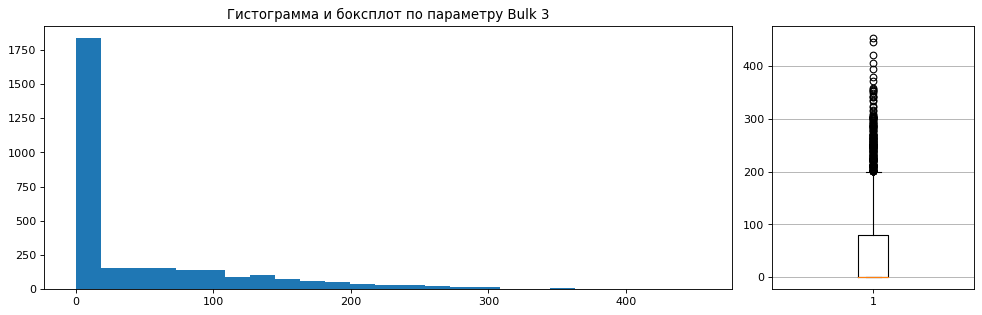

In [112]:
stat_plot(data_bulk, 'Bulk 3', 25)

*Статистики: среднее, минимальные и максимальные значения, медиана и величины 25%- и 75%-квартилей*

In [113]:
data_bulk['Bulk 3'].describe()

count    3129.000000
mean       47.240332
std        74.239954
min         0.000000
25%         0.000000
50%         0.000000
75%        80.000000
max       454.000000
Name: Bulk 3, dtype: float64

Удалим выбросы, выходящие за границу тройного межквартильного интервала.

In [114]:
delete_blowout(data_bulk, 'Bulk 3', 3)

Параметр **Bulk 4**

*Построим гистограмму и боксплот*

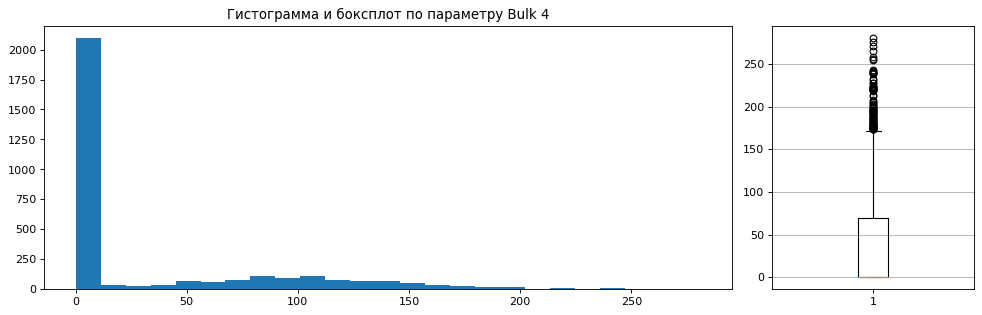

In [115]:
stat_plot(data_bulk, 'Bulk 4', 25)

*Статистики: среднее, минимальные и максимальные значения, медиана и величины 25%- и 75%-квартилей*

In [116]:
data_bulk['Bulk 4'].describe()

count    3109.000000
mean       34.048247
std        56.148540
min         0.000000
25%         0.000000
50%         0.000000
75%        69.000000
max       281.000000
Name: Bulk 4, dtype: float64

Удалим выбросы, выходящие за границу тройного межквартильного интервала.

In [117]:
delete_blowout(data_bulk, 'Bulk 4', 3)

Параметр **Bulk 12**

*Построим гистограмму и боксплот*

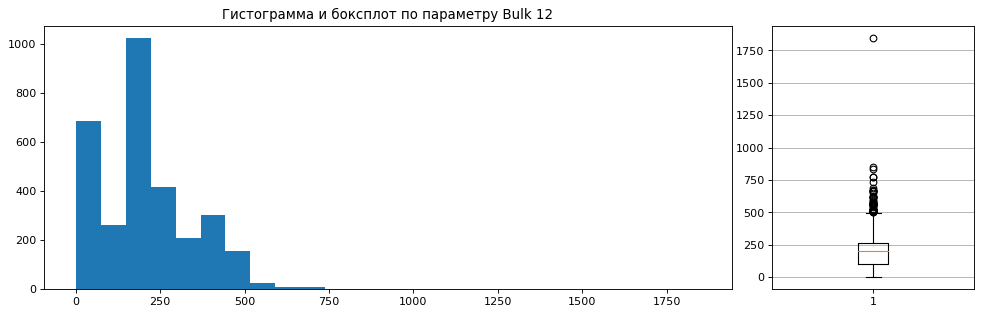

In [118]:
stat_plot(data_bulk, 'Bulk 12', 25)

*Статистики: среднее, минимальные и максимальные значения, медиана и величины 25%- и 75%-квартилей*

In [119]:
data_bulk['Bulk 12'].describe()

count    3108.000000
mean      203.780566
std       151.428574
min         0.000000
25%       105.000000
50%       206.000000
75%       263.000000
max      1849.000000
Name: Bulk 12, dtype: float64

Удалим выбросы, выходящие за границу тройного межквартильного интервала.

In [120]:
delete_blowout(data_bulk, 'Bulk 12', 3)

Параметр **Bulk 14**

*Построим гистограмму и боксплот*

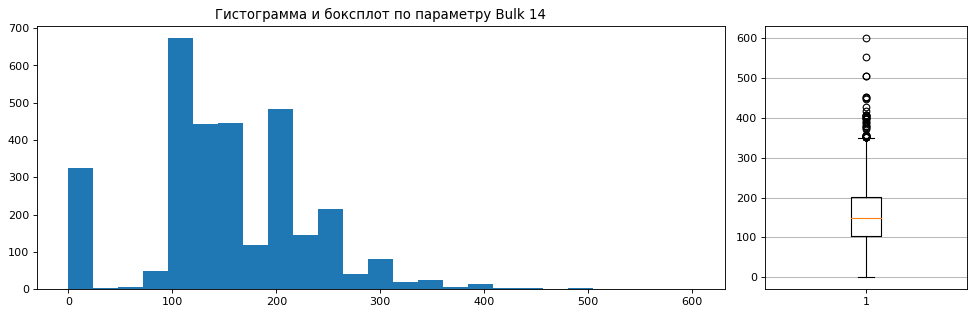

In [121]:
stat_plot(data_bulk, 'Bulk 14', 25)

*Статистики: среднее, минимальные и максимальные значения, медиана и величины 25%- и 75%-квартилей*

In [122]:
data_bulk['Bulk 14'].describe()

count    3103.000000
mean      152.060587
std        80.445665
min         0.000000
25%       104.000000
50%       148.000000
75%       202.000000
max       601.000000
Name: Bulk 14, dtype: float64

Удалим выбросы, выходящие за границу тройного межквартильного интервала.

In [123]:
delete_blowout(data_bulk, 'Bulk 14', 3)

Параметр **Bulk 15**

*Построим гистограмму и боксплот*

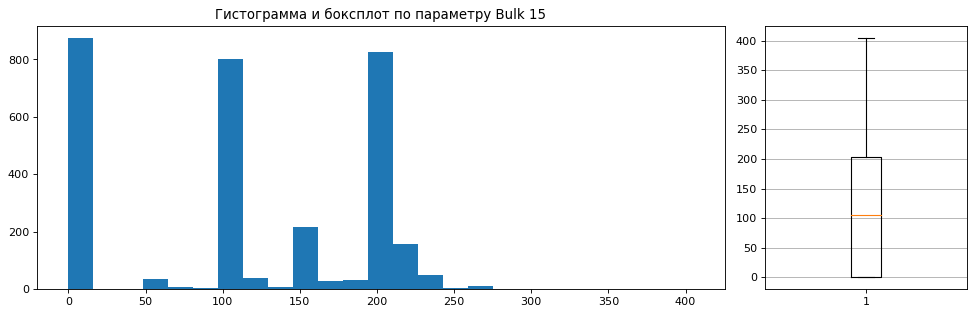

In [124]:
stat_plot(data_bulk, 'Bulk 15', 25)

*Статистики: среднее, минимальные и максимальные значения, медиана и величины 25%- и 75%-квартилей*

In [125]:
data_bulk['Bulk 15'].describe()

count    3099.000000
mean      115.398516
std        84.486018
min         0.000000
25%         0.000000
50%       106.000000
75%       204.000000
max       405.000000
Name: Bulk 15, dtype: float64

Параметр **Wire 1**

*Построим гистограмму и боксплот*

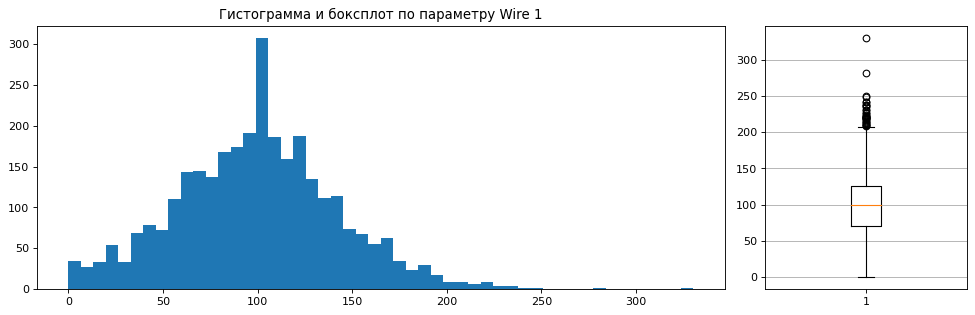

In [126]:
stat_plot(data_wire, 'Wire 1', 50)

*Статистики: среднее, минимальные и максимальные значения, медиана и величины 25%- и 75%-квартилей*

In [127]:
data_wire['Wire 1'].describe()

count    3081.000000
mean      100.044411
std        42.841120
min         0.000000
25%        70.281120
50%       100.114563
75%       125.798405
max       330.314424
Name: Wire 1, dtype: float64

Удалим выбросы, выходящие за границу тройного межквартильного интервала.

In [128]:
delete_blowout(data_wire, 'Wire 1', 3)

Параметр **Wire 2**

*Построим гистограмму и боксплот*

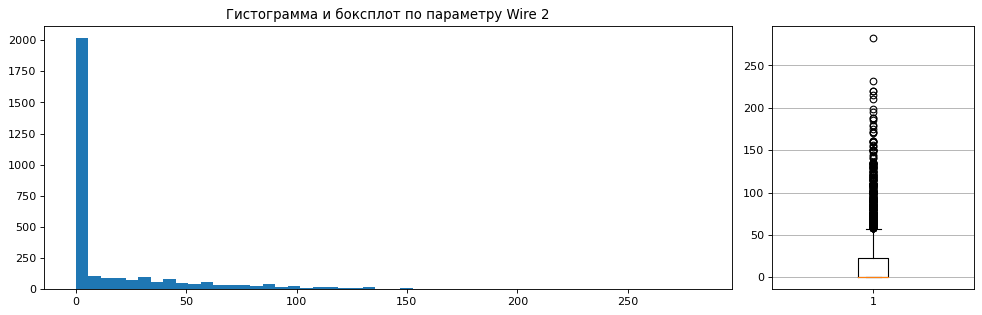

In [129]:
stat_plot(data_wire, 'Wire 2', 50)

*Статистики: среднее, минимальные и максимальные значения, медиана и величины 25%- и 75%-квартилей*

In [130]:
data_wire['Wire 2'].describe()

count    3080.000000
mean       17.695972
std        33.510260
min         0.000000
25%         0.000000
50%         0.000000
75%        23.162880
max       282.780152
Name: Wire 2, dtype: float64

Удалим выбросы, выходящие за границу тройного межквартильного интервала.

In [131]:
delete_blowout(data_wire, 'Wire 2', 3)

#### Объединим полученные данные по температуре и запускам нагрева электродами.

In [132]:
arc_pivot_full = arc_pivot.merge(arc_full_power_sum, on='key', how='left')

In [133]:
arc_pivot_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3201 entries, 0 to 3200
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   key                 3201 non-null   int64          
 1   count_heating       3201 non-null   int64          
 2   active_power_sum    3201 non-null   float64        
 3   heating_time_sum    3201 non-null   timedelta64[ns]
 4   reactive_power_sum  3201 non-null   float64        
 5   sum                 3201 non-null   float64        
dtypes: float64(3), int64(2), timedelta64[ns](1)
memory usage: 175.1 KB


In [134]:
arc_pivot_full.columns = ['key', 'count_heating', 'active_power_sum', 'heating_time_sum',
       'reactive_power_sum', 'full_power_sum']

In [135]:
temp_arc_pivot = temp_diff.merge(arc_pivot_full, on='key', how='left')

In [136]:
temp_arc_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   key                 2385 non-null   int32          
 1   first_temperature   2385 non-null   float64        
 2   last_temperature    2385 non-null   float64        
 3   temp_diff           2385 non-null   float64        
 4   count_heating       2375 non-null   float64        
 5   active_power_sum    2375 non-null   float64        
 6   heating_time_sum    2375 non-null   timedelta64[ns]
 7   reactive_power_sum  2375 non-null   float64        
 8   full_power_sum      2375 non-null   float64        
dtypes: float64(7), int32(1), timedelta64[ns](1)
memory usage: 177.0 KB


#### Объединим данные по температуре, нагреву, газу и добавкам сыпучих материалов и проволки в один датасет

In [137]:
data_pivot = temp_arc_pivot.merge(data_bulk, on='key', how='left')

In [138]:
data_pivot = data_pivot.merge(data_wire, on='key', how='left')

In [139]:
data_pivot = data_pivot.merge(data_gas, on='key', how='left')

In [140]:
data_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   key                 2385 non-null   int32          
 1   first_temperature   2385 non-null   float64        
 2   last_temperature    2385 non-null   float64        
 3   temp_diff           2385 non-null   float64        
 4   count_heating       2375 non-null   float64        
 5   active_power_sum    2375 non-null   float64        
 6   heating_time_sum    2375 non-null   timedelta64[ns]
 7   reactive_power_sum  2375 non-null   float64        
 8   full_power_sum      2375 non-null   float64        
 9   Bulk 1              2310 non-null   float64        
 10  Bulk 2              2310 non-null   float64        
 11  Bulk 3              2310 non-null   float64        
 12  Bulk 4              2310 non-null   float64        
 13  Bulk 5              2310 non-null

Така как нет возможности восстановить данные о пропущенных значениях в столбцах сумма сыпучих материалов, сумма проволки, объем газа, то такие строки удалим.

In [141]:
data_pivot.dropna(axis=0, inplace=True)

In [142]:
data_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2384
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   key                 2166 non-null   int32          
 1   first_temperature   2166 non-null   float64        
 2   last_temperature    2166 non-null   float64        
 3   temp_diff           2166 non-null   float64        
 4   count_heating       2166 non-null   float64        
 5   active_power_sum    2166 non-null   float64        
 6   heating_time_sum    2166 non-null   timedelta64[ns]
 7   reactive_power_sum  2166 non-null   float64        
 8   full_power_sum      2166 non-null   float64        
 9   Bulk 1              2166 non-null   float64        
 10  Bulk 2              2166 non-null   float64        
 11  Bulk 3              2166 non-null   float64        
 12  Bulk 4              2166 non-null   float64        
 13  Bulk 5              2166 non-null

#### Переведем данные о длительности нагрева электродами из минут в секунды.

In [143]:
def heating_seconds(row):
    heating_seconds = row['heating_time_sum'].total_seconds()
    return heating_seconds

In [144]:
data_pivot['heating_seconds'] = data_pivot.apply(heating_seconds, axis=1)

In [145]:
data_pivot.head()

,key,first_temperature,last_temperature,temp_diff,count_heating,active_power_sum,heating_time_sum,reactive_power_sum,full_power_sum,Bulk 1,...,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,sum_wire_add,gas 1,heating_seconds
0,1,1571.0,1613.0,42.0,5.0,4.878147,00:18:18,3.183241,5.826395,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.059998,29.749986,1098.0
1,2,1581.0,1602.0,21.0,4.0,3.052598,00:13:31,1.998112,3.649216,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.052315,12.555561,811.0
2,3,1596.0,1599.0,3.0,5.0,2.525882,00:10:55,1.599076,2.989534,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.160157,28.554793,655.0
3,4,1601.0,1625.0,24.0,4.0,3.209250,00:12:21,2.060298,3.814962,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.063515,18.841219,741.0
4,5,1576.0,1602.0,26.0,4.0,3.347173,00:14:29,2.252643,4.035758,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.352796,5.413692,869.0


### Исследуем зависимости финальной температуры от других параметров 

In [146]:
data_pivot.loc[:,['last_temperature', 'first_temperature', 'heating_seconds',
                   'count_heating', 'active_power_sum', 'reactive_power_sum', 'full_power_sum', 
                   'gas 1']].corr()

,last_temperature,first_temperature,heating_seconds,count_heating,active_power_sum,reactive_power_sum,full_power_sum,gas 1
last_temperature,1.000000,0.314428,0.305952,0.226763,0.315259,0.265346,0.298706,0.090108
first_temperature,0.314428,1.000000,-0.430772,-0.202124,-0.480412,-0.462945,-0.479076,0.017274
heating_seconds,0.305952,-0.430772,1.000000,0.778909,0.975722,0.962311,0.980490,0.353844
count_heating,0.226763,-0.202124,0.778909,1.000000,0.738852,0.729473,0.742971,0.368655
active_power_sum,0.315259,-0.480412,0.975722,0.738852,1.000000,0.956635,0.993266,0.338072
reactive_power_sum,0.265346,-0.462945,0.962311,0.729473,0.956635,1.000000,0.983781,0.313913
full_power_sum,0.298706,-0.479076,0.980490,0.742971,0.993266,0.983781,1.000000,0.331891
gas 1,0.090108,0.017274,0.353844,0.368655,0.338072,0.313913,0.331891,1.000000


In [147]:
data_pivot.loc[:,['last_temperature', 
                   'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7', 'Bulk 8', 
                   'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15',
                   'gas 1']].corr()

,last_temperature,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,gas 1
last_temperature,1.000000,-0.069223,0.008604,-0.036818,0.192459,0.014661,-0.190132,-0.009217,-0.029779,-0.020801,0.053528,-0.107176,0.243243,-0.039445,0.080817,0.255785,0.090108
Bulk 1,-0.069223,1.000000,0.114951,-0.003481,0.026314,0.008247,0.014741,0.092869,-0.005978,-0.018022,-0.020125,-0.045275,0.289833,-0.006809,0.203166,0.022916,0.149082
Bulk 2,0.008604,0.114951,1.000000,-0.030762,0.023596,0.250419,-0.018911,0.745768,-0.001033,-0.003115,-0.011982,-0.008739,-0.066655,-0.003510,-0.093184,-0.069426,0.071960
Bulk 3,-0.036818,-0.003481,-0.030762,1.000000,-0.303567,0.006856,0.065178,-0.028473,0.024040,0.020929,-0.084477,-0.029671,0.016865,-0.003270,0.001968,-0.016881,0.059737
Bulk 4,0.192459,0.026314,0.023596,-0.303567,1.000000,0.021108,-0.254025,0.027832,-0.014144,-0.019808,-0.095253,-0.119634,0.103018,0.012046,-0.092413,0.104173,0.014700
Bulk 5,0.014661,0.008247,0.250419,0.006856,0.021108,1.000000,-0.024782,0.220938,-0.002227,-0.006714,-0.025829,-0.018839,-0.053190,-0.007567,-0.037961,-0.047589,0.035059
Bulk 6,-0.190132,0.014741,-0.018911,0.065178,-0.254025,-0.024782,1.000000,-0.015819,-0.008454,-0.025485,-0.098036,0.200841,-0.113571,-0.000502,0.184124,-0.120158,0.127233
Bulk 7,-0.009217,0.092869,0.745768,-0.028473,0.027832,0.220938,-0.015819,1.000000,-0.000956,-0.002883,-0.011090,-0.008089,-0.058792,-0.003249,-0.082441,-0.060834,0.064064
Bulk 8,-0.029779,-0.005978,-0.001033,0.024040,-0.014144,-0.002227,-0.008454,-0.000956,1.000000,0.556978,-0.005356,-0.003907,-0.029798,-0.001569,-0.041658,-0.031037,0.006524
Bulk 9,-0.020801,-0.018022,-0.003115,0.020929,-0.019808,-0.006714,-0.025485,-0.002883,0.556978,1.000000,-0.016147,-0.011777,-0.059066,-0.004730,0.031549,-0.093562,0.079688


In [148]:
data_pivot.loc[:, ['last_temperature', 
                   'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7',
                   'Wire 8', 'Wire 9', 'gas 1']].corr()

,last_temperature,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,gas 1
last_temperature,1.000000,0.316596,-0.195876,-0.036030,-0.051020,NaN,-0.024149,NaN,-0.015532,-0.004106,0.090108
Wire 1,0.316596,1.000000,-0.090446,0.064979,-0.100951,NaN,-0.085822,NaN,0.011940,-0.007821,0.144614
Wire 2,-0.195876,-0.090446,1.000000,0.116645,-0.024492,NaN,-0.053992,NaN,0.064522,0.056953,0.032607
Wire 3,-0.036030,0.064979,0.116645,1.000000,0.097014,NaN,0.140123,NaN,-0.006702,-0.005877,0.080123
Wire 4,-0.051020,-0.100951,-0.024492,0.097014,1.000000,NaN,0.256670,NaN,-0.002906,-0.002548,0.036382
Wire 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wire 6,-0.024149,-0.085822,-0.053992,0.140123,0.256670,NaN,1.000000,NaN,-0.006467,-0.005671,0.025250
Wire 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wire 8,-0.015532,0.011940,0.064522,-0.006702,-0.002906,NaN,-0.006467,NaN,1.000000,-0.003741,0.081572
Wire 9,-0.004106,-0.007821,0.056953,-0.005877,-0.002548,NaN,-0.005671,NaN,-0.003741,1.000000,-0.008930


#### Основной параметр, от которого зависит финальная температура, - это начальная температура. Также оказывают влияние добавки сыпучих материалов Bulk 4, 6, 11, 12, 15 и проволки Wire 1, 2.

## Подготовка данных для обучения моделей

В качестве датасета для обучения возьмем датасет **data_pivot** и следующие параметры: **last_temperature, 'heating_seconds', 'count_heating', 'active_power_sum', 'reactive_power_sum', 'full_power_sum' 'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15', 'sum_bulk_add', 'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 6', 'Wire 8', 'Wire 9', 'sum_wire_add', 'gas 1'**.   
В качестве целевого параметра будет использоваться параметр **last_temperature**.

In [149]:
target = data_pivot['last_temperature']
features = data_pivot[['first_temperature', 'heating_seconds',
                       'count_heating', 'active_power_sum', 'reactive_power_sum', 'full_power_sum', 
                       'Bulk 1', 'Bulk 2', 'Bulk 3',
                       'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10',
                       'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15', 'sum_bulk_add',
                       'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 6', 
                       'Wire 8', 'Wire 9', 'sum_wire_add', 'gas 1']]

Для разбиения данных на выборки воспользуемся методом **train_test_split** из модуля **sklearn.model_selection**.  
Разобьем исходные данные на три части: обучающую, валидационную и тестовую в соотношении 9:1.

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.1, random_state=12345)

#### Масштабируем признаки

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
numeric = ['first_temperature', 'heating_seconds',
           'count_heating', 'active_power_sum', 'reactive_power_sum', 'full_power_sum', 
           'Bulk 1', 'Bulk 2', 'Bulk 3',
           'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10',
           'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15', 'sum_bulk_add',
           'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 6', 
           'Wire 8', 'Wire 9', 'sum_wire_add', 'gas 1']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

<ipython-input-153-cb8485c30767>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
S:\Programs\anaconda3\lib\site-packages\pandas\core\frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
S:\Programs\anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [154]:
pd.set_option('display.max_columns', 50)
features_train.head()

,first_temperature,heating_seconds,count_heating,active_power_sum,reactive_power_sum,full_power_sum,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,sum_bulk_add,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 8,Wire 9,sum_wire_add,gas 1
2040,-0.318099,-1.166487,-1.08675,-0.929781,-1.062619,-0.987802,-0.274051,-0.03925,0.520320,-0.656915,-0.099918,-0.401119,-0.046914,-0.022657,-0.068316,-0.250052,-0.185489,0.297769,-0.073606,-0.565191,1.210015,0.220668,-0.926338,-0.546473,-0.105395,-0.041931,6.078680,-0.068872,-0.060392,-0.092078,-0.601284
1416,-1.304499,-0.269816,0.24203,-0.032094,-0.110027,-0.065237,-0.274051,-0.03925,-0.021638,2.224490,-0.099918,-0.401119,-0.046914,-0.022657,-0.068316,-0.250052,-0.185489,-0.034716,-0.073606,-0.283453,-0.204858,0.166330,-0.019136,-0.546473,-0.105395,-0.041931,-0.095871,-0.068872,-0.060392,-0.300789,-0.255283
110,0.196545,0.508366,0.24203,0.378261,0.533965,0.433038,-0.274051,-0.03925,0.349175,-0.656915,-0.099918,-0.401119,-0.046914,-0.022657,-0.068316,-0.250052,-0.185489,-0.028066,-0.073606,-0.642028,0.984111,-0.090867,-1.114460,-0.546473,-0.105395,-0.041931,-0.095871,-0.068872,-0.060392,-1.104999,-0.570514
942,-0.060777,-0.718152,-0.42236,-0.702200,-0.800760,-0.746906,-0.274051,-0.03925,-0.634906,0.563445,-0.099918,-0.401119,-0.046914,-0.022657,-0.068316,-0.250052,-0.185489,-1.397901,-0.073606,-1.961074,-1.453274,-1.941966,0.051020,-0.546473,-0.105395,-0.041931,-0.095871,-0.068872,-0.060392,-0.249279,-1.214989
1114,-1.819143,1.004738,-0.42236,1.105863,1.130757,1.120548,-0.274051,-0.03925,-0.634906,-0.656915,-0.099918,1.889199,-0.046914,-0.022657,-0.068316,-0.250052,-0.185489,1.355068,-0.073606,1.445393,0.948442,1.437829,-0.304214,3.480858,-0.105395,-0.041931,-0.095871,-0.068872,-0.060392,1.063254,-0.251997


## Обучение моделей

Для оценки качества моделей будем использовать метрику **mean_absolute_error**

In [155]:
from sklearn.metrics import mean_absolute_error

### Линейная регрессия

In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
model_lr = LinearRegression()

Обучаем модель

In [158]:
model_lr.fit(features_train, target_train)

LinearRegression()

In [159]:
predicted_train_lr = model_lr.predict(features_train)

In [160]:
mae_train_lr = mean_absolute_error(target_train, predicted_train_lr)

Рассчитываем метрику качества на обучающей выборке

In [161]:
mae_train_lr

6.116786989398148

Рассчитываем метрику качества на тестовой модели

In [162]:
predicted_test_lr = model_lr.predict(features_test)

In [163]:
mae_test_lr = mean_absolute_error(target_test, predicted_test_lr)

In [164]:
mae_test_lr

5.964500739657483

#### Модель линейной регрессии показала метрику MAE на обучающей выборке 6.12, на тестовой - 5.96.

### Модель CatBoostRegressor

In [165]:
from catboost import CatBoostRegressor

In [166]:
model_cbr = CatBoostRegressor(loss_function='MAE', learning_rate=0.01)

In [167]:
grid = {'depth': [4, 8, 12, 16],
        'iterations': [100, 250, 500],
        'l2_leaf_reg': [8, 16, 24, 32]}

grid_search_result = model_cbr.grid_search(grid, 
                                       X=features_train, 
                                       y=target_train,
                                       cv = 3)


bestTest = 584.7233921
bestIteration = 99

0:	loss: 584.7233921	best: 584.7233921 (0)	total: 467ms	remaining: 21.9s

bestTest = 584.6755316
bestIteration = 99

1:	loss: 584.6755316	best: 584.6755316 (1)	total: 716ms	remaining: 16.5s

bestTest = 584.7101138
bestIteration = 99

2:	loss: 584.7101138	best: 584.6755316 (1)	total: 937ms	remaining: 14.1s

bestTest = 584.7726879
bestIteration = 99

3:	loss: 584.7726879	best: 584.6755316 (1)	total: 1.17s	remaining: 12.9s

bestTest = 131.1234512
bestIteration = 249

4:	loss: 131.1234512	best: 131.1234512 (4)	total: 1.75s	remaining: 15s

bestTest = 131.0654101
bestIteration = 249

5:	loss: 131.0654101	best: 131.0654101 (5)	total: 2.31s	remaining: 16.2s

bestTest = 131.1539042
bestIteration = 249

6:	loss: 131.1539042	best: 131.0654101 (5)	total: 2.9s	remaining: 17s

bestTest = 131.2240654
bestIteration = 249

7:	loss: 131.2240654	best: 131.0654101 (5)	total: 3.48s	remaining: 17.4s

bestTest = 12.93846153
bestIteration = 499

8:	loss: 12.9384615	

In [168]:
model_cbr.get_best_score()

{'learn': {'MAE': 5.539202634766754}}

In [169]:
model_cbr.get_params()

{'learning_rate': 0.01,
 'loss_function': 'MAE',
 'depth': 4,
 'l2_leaf_reg': 16,
 'iterations': 500}

In [170]:
pred_test_cbr = model_cbr.predict(features_test)

In [171]:
mae_test_cbr = mean_absolute_error(target_test, pred_test_cbr)

In [172]:
mae_test_cbr

5.4856757888784236

#### Модель LightGBMRegressor показала метрику MAE на обучающей выборке 5.54, на тестовой - 5.49.

### Модель LightGBMRegressor

In [173]:
import lightgbm

In [174]:
from sklearn.model_selection import GridSearchCV

In [175]:
model_lgbm = lightgbm.LGBMRegressor(learning_rate=0.01)

Задаем сетку параметров для получения лучшей метрики.

In [176]:
param_grid = {'max_depth': [4, 8, 12, 16, 20, 24],
              'n_estimators': [100, 200, 300, 500, 750],
              'num_leaves': [8, 16, 24, 32, 64, 144]}

In [177]:
grid = GridSearchCV(model_lgbm, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', verbose = 50)

Обучаем модель

In [178]:
%%time
grid.fit(features_train, target_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=4, n_estimators=100, num_leaves=8 .....................
[CV]  max_depth=4, n_estimators=100, num_leaves=8, score=-6.817, total=   0.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] max_depth=4, n_estimators=100, num_leaves=8 .....................
[CV]  max_depth=4, n_estimators=100, num_leaves=8, score=-6.675, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] max_depth=4, n_estimators=100, num_leaves=8 .....................
[CV]  max_depth=4, n_estimators=100, num_leaves=8, score=-6.545, total=   0.1s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[CV] max_depth=4, n_estimators=100, num_leaves=16 ....................
[CV]  max_depth=4, n_estimators=100, num_leaves=16, score=-6.720, total=   0.1s
[Parallel(n_job

GridSearchCV(cv=3, estimator=LGBMRegressor(learning_rate=0.01),
             param_grid={'max_depth': [4, 8, 12, 16, 20, 24],
                         'n_estimators': [100, 200, 300, 500, 750],
                         'num_leaves': [8, 16, 24, 32, 64, 144]},
             scoring='neg_mean_absolute_error', verbose=50)

Лучшие параметры

In [179]:
grid.best_params_

{'max_depth': 8, 'n_estimators': 750, 'num_leaves': 16}

Лучшее значение метрики

In [180]:
grid.best_score_

-5.752540533080022

In [181]:
grid.best_estimator_

LGBMRegressor(learning_rate=0.01, max_depth=8, n_estimators=750, num_leaves=16)

Рассчитываем метрику качества на тестовой модели

In [182]:
pred_test_lgbm = grid.predict(features_test)

In [183]:
mae_test_lgbm = mean_absolute_error(target_test, pred_test_lgbm)

In [184]:
mae_test_lgbm

5.315630687743664

#### Модель LightGBMRegressor показала метрику MAE на обучающей выборке 5.75, на тестовой - 5.32.

### Проверка модели на адекватность

Рассчитаем метрику *MAE* для константной модели, в качестве предсказания возьмем среднее значение финальной температуры для обучающего набора данных.

In [185]:
mean_temp = pd.Series(target_train.mean(), index=target_test.index)

In [186]:
mae_mean_temp = mean_absolute_error(target_test, mean_temp)

In [187]:
mae_mean_temp

7.5548893087084785

### Анализ значимости входных параметров

Построим график важности входных параметров модели

In [188]:
feature_importances = pd.DataFrame(data=grid.best_estimator_.feature_importances_, index=['first_temperature', 'heating_seconds',
   'count_heating', 'active_power_sum', 'reactive_power_sum', 'full_power_sum', 
   'Bulk 1', 'Bulk 2', 'Bulk 3',
   'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10',
   'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15', 'sum_bulk_add',
   'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 6', 
   'Wire 8', 'Wire 9', 'sum_wire_add', 'gas 1'], columns=['importance'])

In [189]:
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

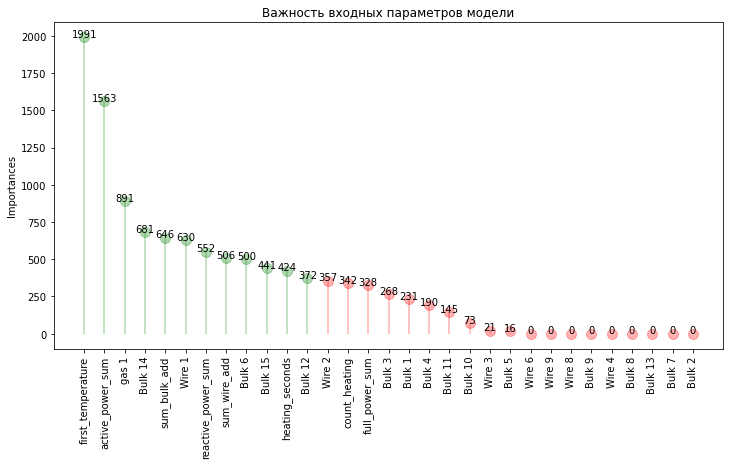

In [190]:
# ----------------------------------------------------------------------------------------------------
# fitler x and y
x = feature_importances.index
y = feature_importances['importance']

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
for x_, y_ in zip(x, y):
    # make a scatter plot
    ax.scatter(x_, y_, color = "red" if y_ < y.mean() else "green", alpha = 0.3, s = 100)
    
    # add vertical lines to connect them to the data point (head of the lollipop)
    ax.vlines(x_, ymin = 0, ymax = y_, color = "red" if y_ < y.mean() else "green", alpha = 0.3)
    
    # add text with the data
    ax.text(x_, y_ + 0.5, round(y_, 1), horizontalalignment='center')
    
# ----------------------------------------------------------------------------------------------------
# prettify the plot
# change the ylim
#ax.set_ylim(0, 30)

# rotate the x ticks 90 degrees
ax.set_xticklabels(x, rotation = 90)

# add an y label
ax.set_ylabel("Importances")

# set a title
ax.set_title("Важность входных параметров модели");

#### Наибольший вес имеют следующие параметры, в порядке убывания: начальная температура нагрева, активная мощность, объем инертного газа. Не оказывают влияение на целевую переменную следующие параметры: Wire 4, Wire 5, Wire 6, Wire 7, Wire 8, Wire 9, Bulk 2, Bulk 7, Bulk 8, Bulk 9. Остальные параметры оказывают влияние на целевую модель, но являются менее значимыми.

## Вывод

Модель **LightGBMRegressor** показала лучший результат, на обучающей выборке *МАЕ* = **5.75**, на тестовой = **5.31**. Также модель показала лучший результат, чем константная модель.  
Модель **LightGBMRegressor** *рекомендуется* к использованию для прогнозирования финальной температуры нагрева стали.  

При оптимизации процесса стоит обратить наибольшее внимание на начальную температура, активную мощности и объем инертного газа, так как они имеют наибольшее влияние на финальную температуру. Не оказывают влияние следующие параметры: Wire 4, Wire 5, Wire 6, Wire 7, Wire 8, Wire 9, Bulk 2, Bulk 7, Bulk 8, Bulk 9